In [1]:
import sys
sys.path.append('../../') # or just install the module

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# https://blog.finxter.com/how-to-plot-sklearn-confusion-matrix-with-labels/
actual_data = \
       ['apples',  'pears',   'apples',
        'apples',  'apples',  'pears',
        'oranges', 'oranges', 'apples',
        'apples',  'apples',  'apples',
        'apples',  'apples',  'pears',
        'apples',  'oranges', 'apples',
        'apples',  'apples']
predicted_data = \
      ['oranges', 'pears',   'apples',
       'apples',  'apples',  'pears',
       'oranges', 'oranges', 'apples', 
       'apples',  'apples',  'apples',
       'apples',  'apples',  'pears',
       'apples',  'oranges', 'oranges',
       'apples',  'oranges']

class_names = np.unique(actual_data)
d = {c:kc for kc,c in enumerate(class_names)}
print(d)
y_pred_p = []
y_true = []
for k in range(0, len(actual_data)):
    y_true += [d[actual_data[k]]]
    _p = .8
    p = np.zeros(shape=(len(class_names)))+(1-_p)/(len(class_names)-1)
    p[d[predicted_data[k]]] = _p
    y_pred_p += [p]
y_pred_p = np.array(y_pred_p)
y_true = np.array(y_true)
print(y_pred_p, y_pred_p.shape, y_true, class_names)

{'apples': 0, 'oranges': 1, 'pears': 2}
[[0.1 0.8 0.1]
 [0.1 0.1 0.8]
 [0.8 0.1 0.1]
 [0.8 0.1 0.1]
 [0.8 0.1 0.1]
 [0.1 0.1 0.8]
 [0.1 0.8 0.1]
 [0.1 0.8 0.1]
 [0.8 0.1 0.1]
 [0.8 0.1 0.1]
 [0.8 0.1 0.1]
 [0.8 0.1 0.1]
 [0.8 0.1 0.1]
 [0.8 0.1 0.1]
 [0.1 0.1 0.8]
 [0.8 0.1 0.1]
 [0.1 0.8 0.1]
 [0.1 0.8 0.1]
 [0.8 0.1 0.1]
 [0.1 0.8 0.1]] (20, 3) [0 2 0 0 0 2 1 1 0 0 0 0 0 0 2 0 1 0 0 0] ['apples' 'oranges' 'pears']


[[11  3  0]
 [ 0  3  0]
 [ 0  0  3]]
(3, 3)
[[96.970±3.030 1.515±1.515 1.515±1.515]
 [1.515±1.515 96.970±3.030 1.515±1.515]
 [21.553±.125 .350±.350 78.097±.475]]


,oranges,pears,apples
oranges,96.970±3.030,1.515±1.515,1.515±1.515
pears,1.515±1.515,96.970±3.030,1.515±1.515
apples,21.553±.125,.350±.350,78.097±.475


(<Figure size 1200x1000 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff5e0f71410>)

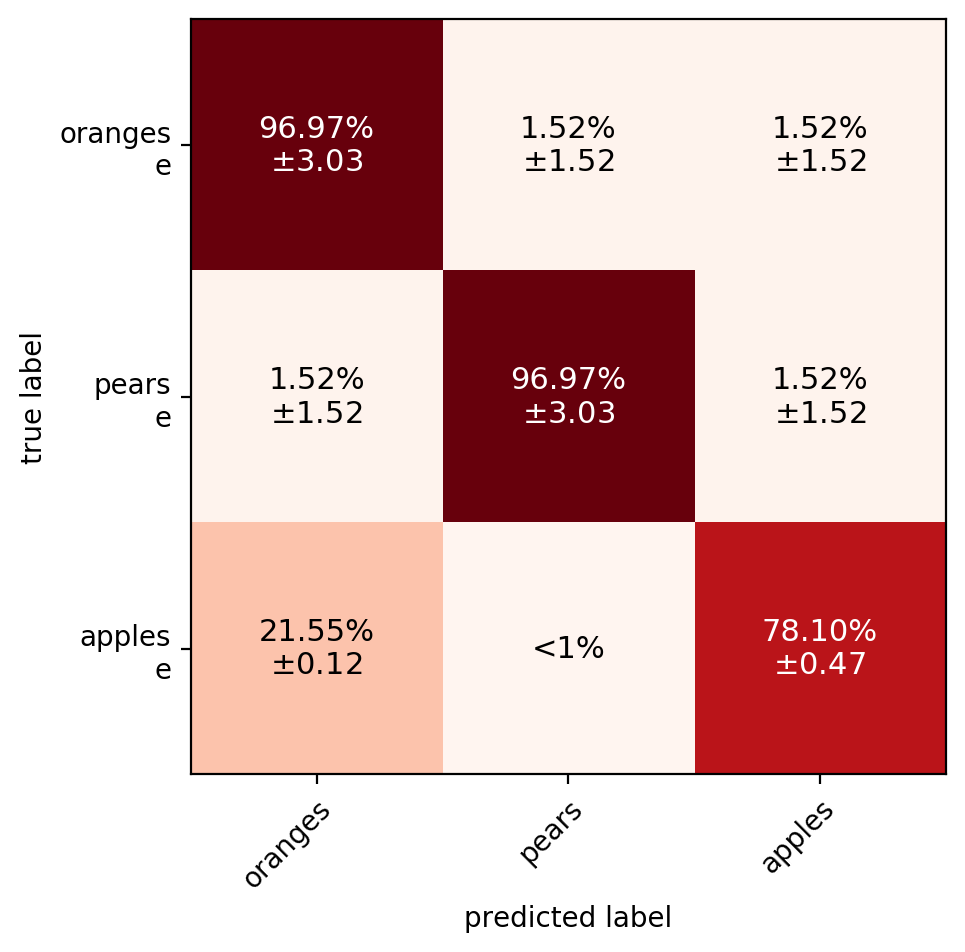

In [3]:
%load_ext autoreload
%autoreload 2
from fuzzytools.datascience import metrics
from fuzzytools.datascience.cms import ConfusionMatrix
from fuzzytools.matplotlib.cm_plots import plot_custom_confusion_matrix
import pandas as pd

metrics_cdict, metrics_dict, cm = metrics.get_multiclass_metrics(y_pred_p, y_true, class_names)
title = ''
print(cm)
cm = ConfusionMatrix([cm, cm+.1], class_names)
cm.reorder_classes(['oranges', 'pears', 'apples'])
print(cm.cm_df.shape)
print(cm.get_values())
display(cm)
true_label_d = {c:'e' for c in class_names}
plot_custom_confusion_matrix(cm,
    title=title[:-1],
    figsize=(6,5),
    true_label_d=true_label_d,
    )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,oranges,pears,apples
oranges,96.970±3.030,1.515±1.515,1.515±1.515
pears,1.515±1.515,96.970±3.030,1.515±1.515
apples,21.553±.125,.350±.350,78.097±.475


,oranges,pears,apples
oranges,96.970±3.030,1.515±1.515,1.515±1.515
pears,1.515±1.515,96.970±3.030,1.515±1.515
apples,21.553±.125,.350±.350,78.097±.475


(<Figure size 1200x1000 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff66431ee90>)

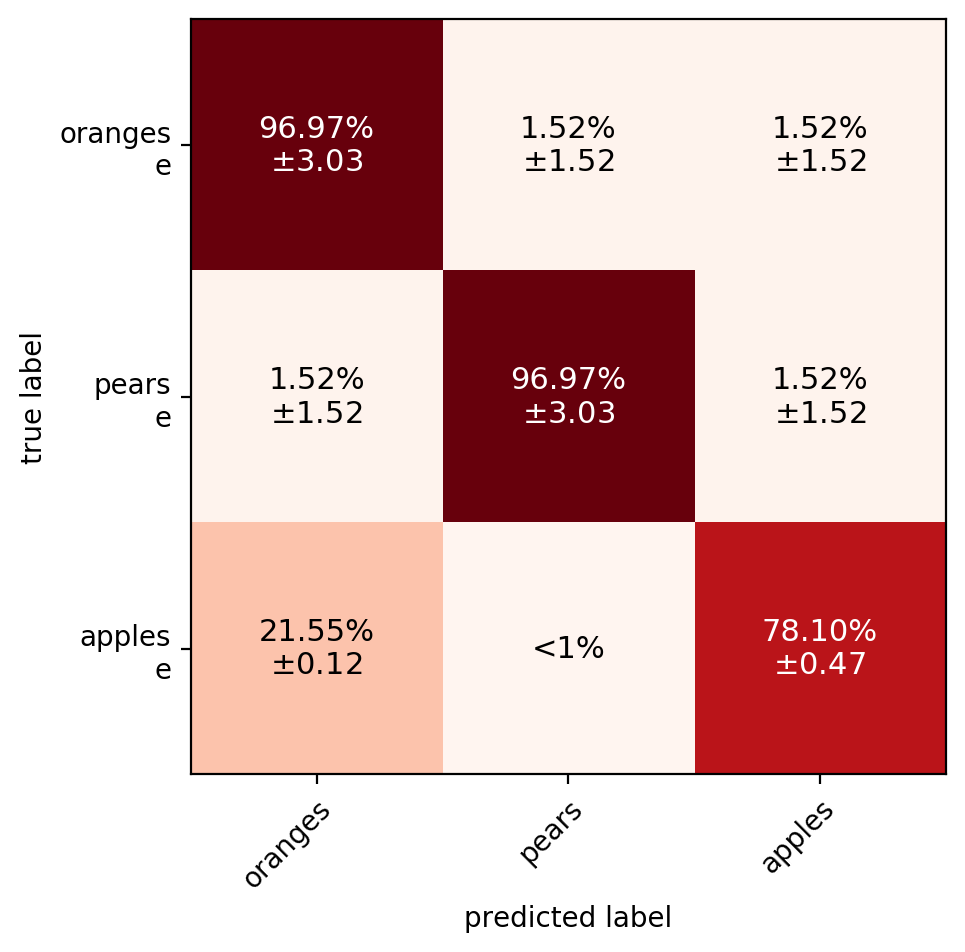

In [4]:
%load_ext autoreload
%autoreload 2

cm2 = (cm+cm+cm)/1
display(cm2)
cm2 = sum([cm,cm,cm])/1
display(cm2)
plot_custom_confusion_matrix(cm2,
    title=title[:-1],
    figsize=(6,5),
    true_label_d=true_label_d,
    )